In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daibetes/diabetes (1).csv


In [2]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv("/kaggle/input/daibetes/diabetes (1).csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# **Checking Null value**

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

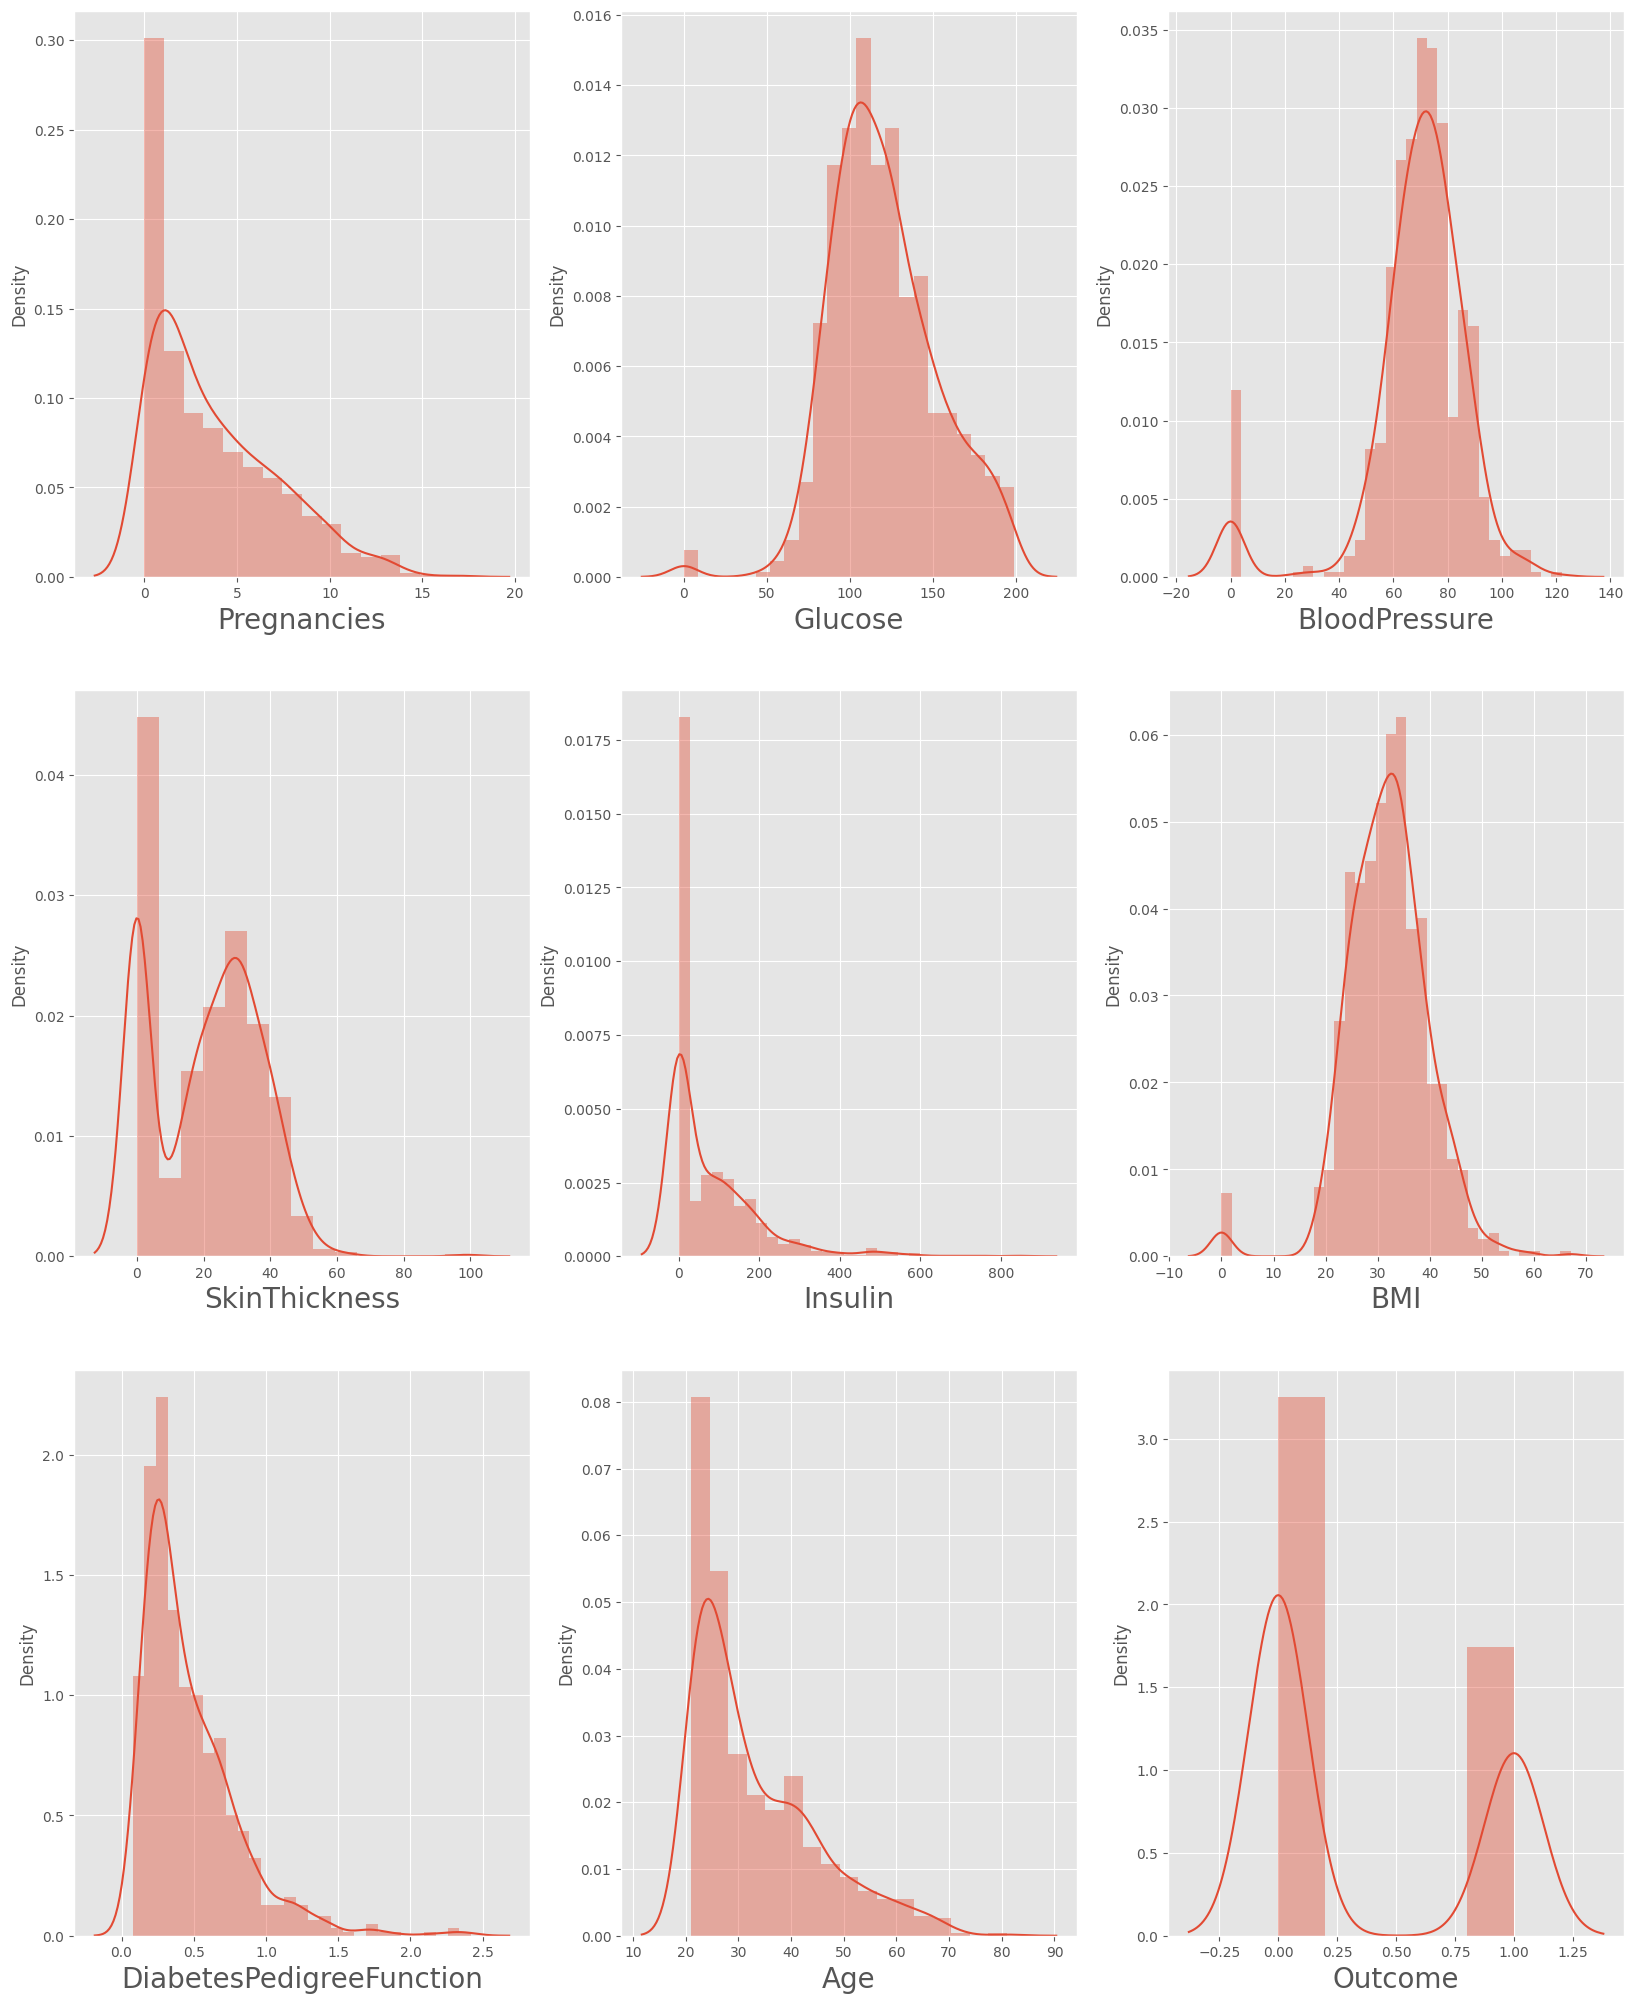

In [8]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

# Outlier Detection


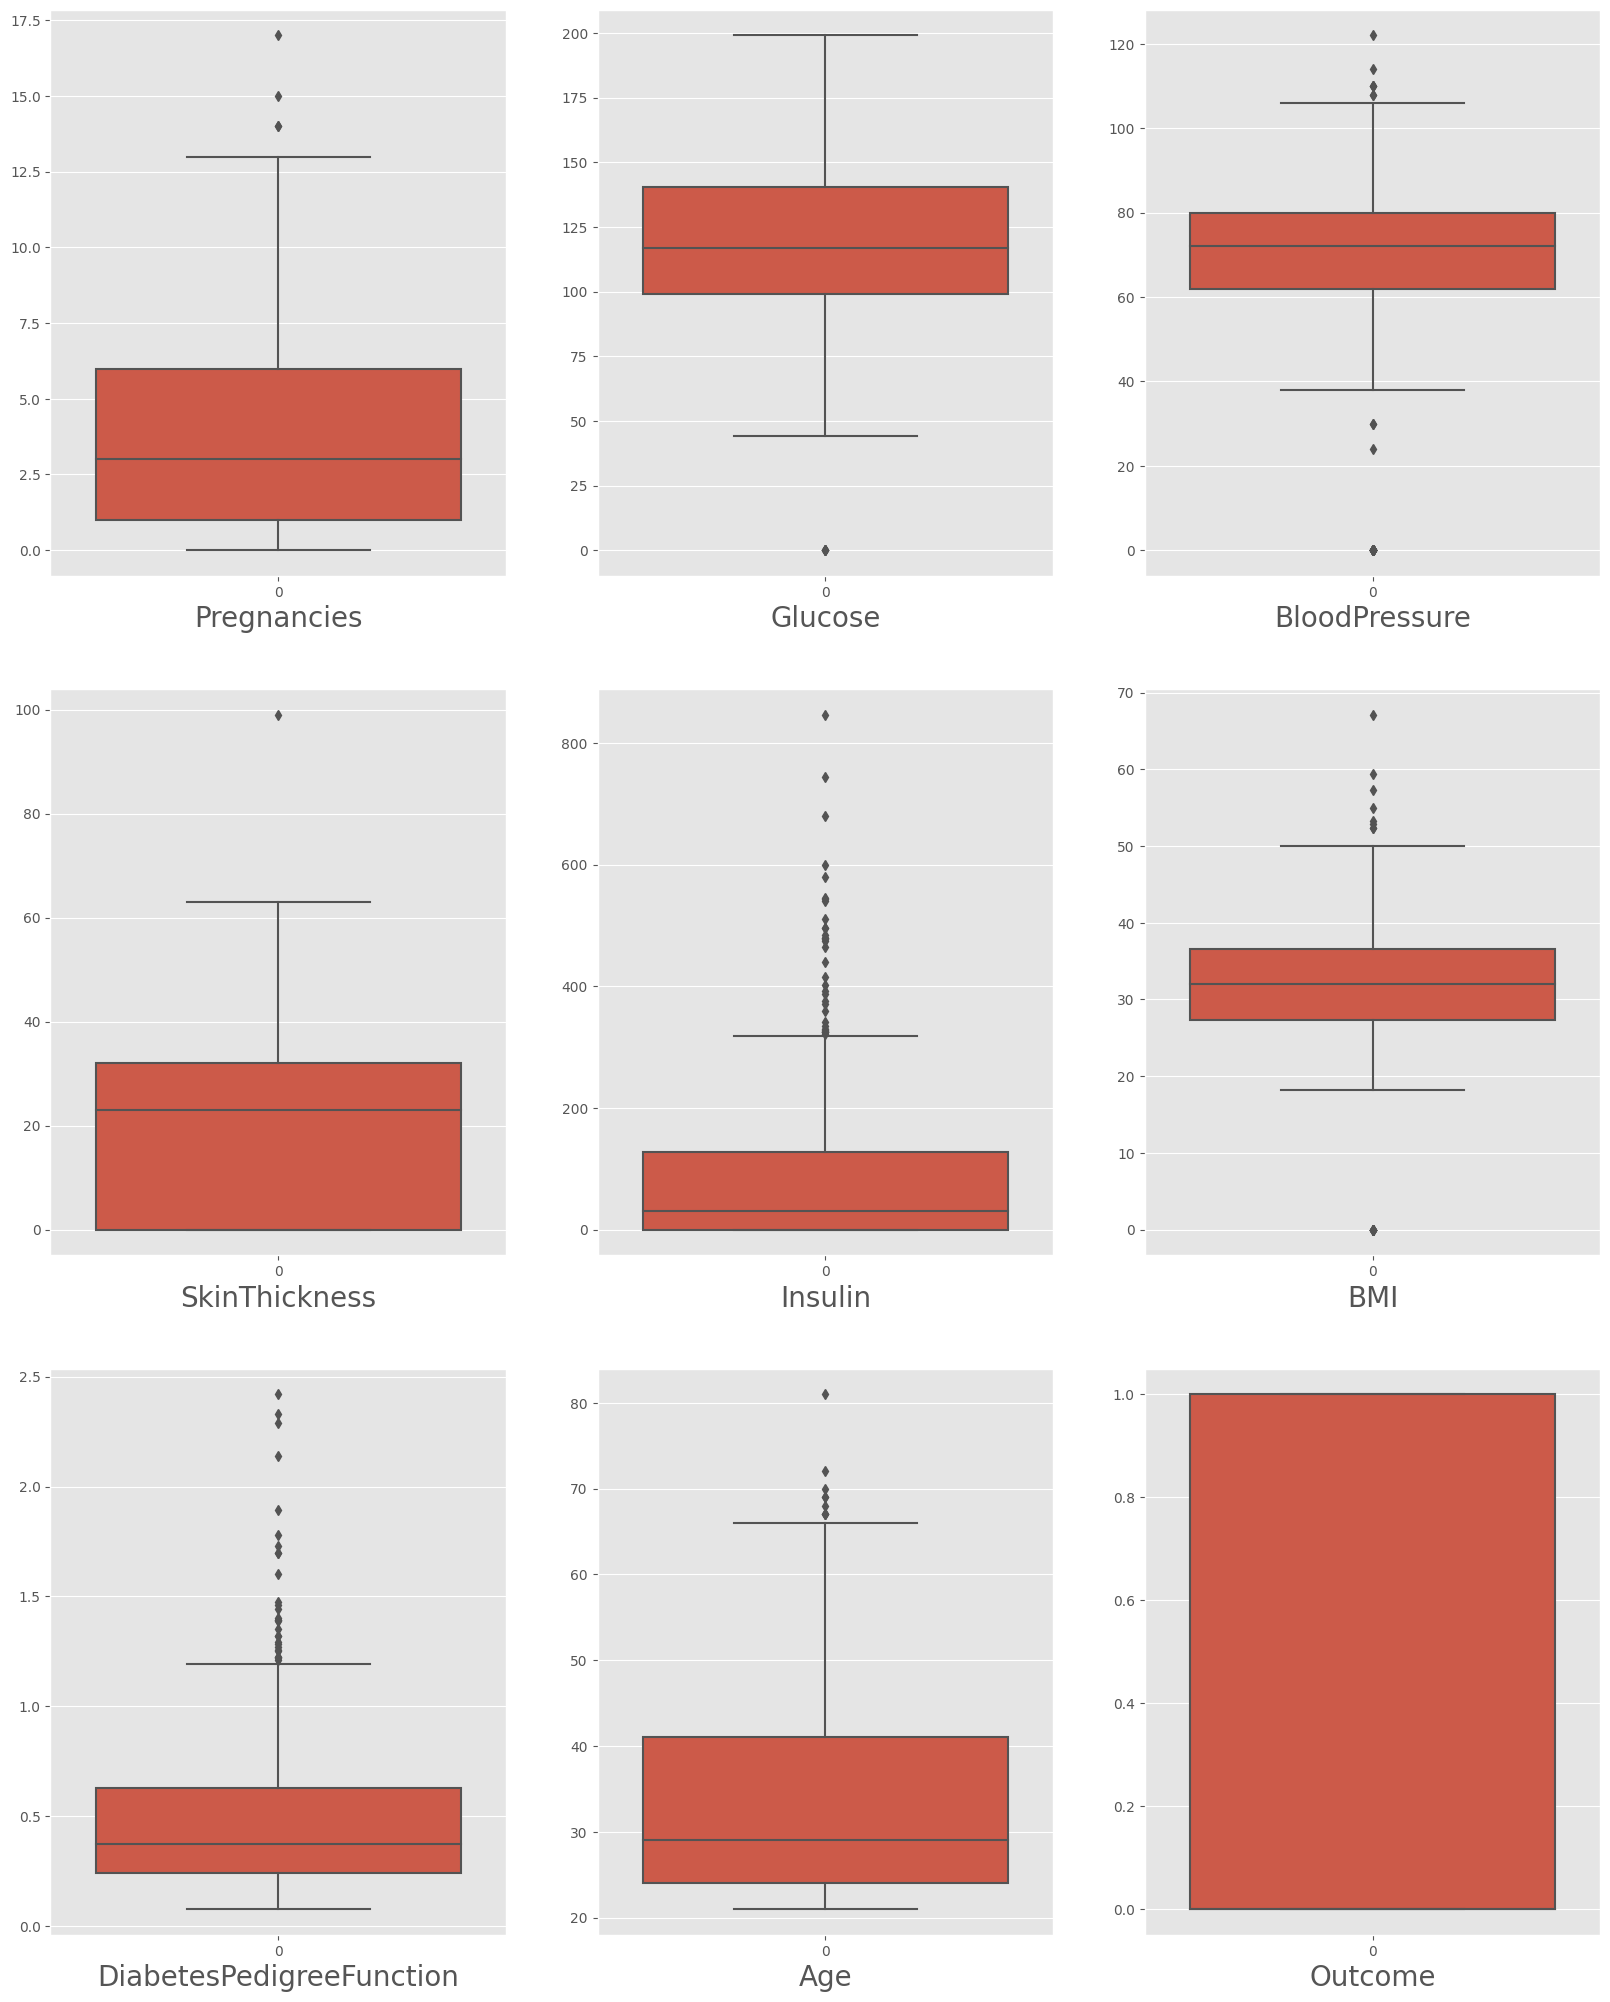

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

# Replace 0 to mean 

> As Glucose,BloodPressure,SkinThickness,Insulin,BMI these columns have 0 as its values. We'll clean some of our dependent variables, replacing the 0's in the features with their mean.

In [10]:
cols_with_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI',]
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['Pregnancies']=df['Pregnancies'].replace(0,df['Pregnancies'].mean())


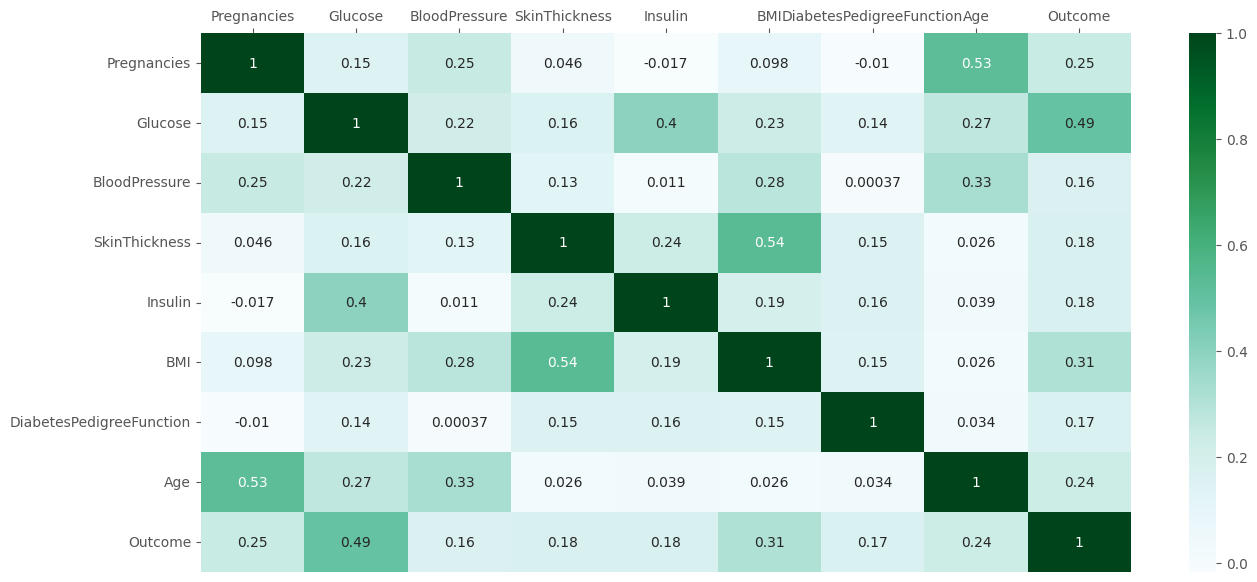

In [11]:
plt.figure(figsize=(15,7))
cor=df.corr()
ax=sns.heatmap(cor,annot=True,cmap="BuGn")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.show()

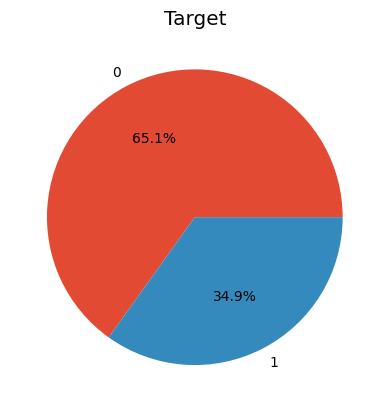

In [12]:
size = df['Outcome'].value_counts()
mylabel = [0,1]
plt.pie(size, labels = mylabel, autopct='%1.1f%%')
plt.title('Target')
plt.ylabel('')
plt.show()

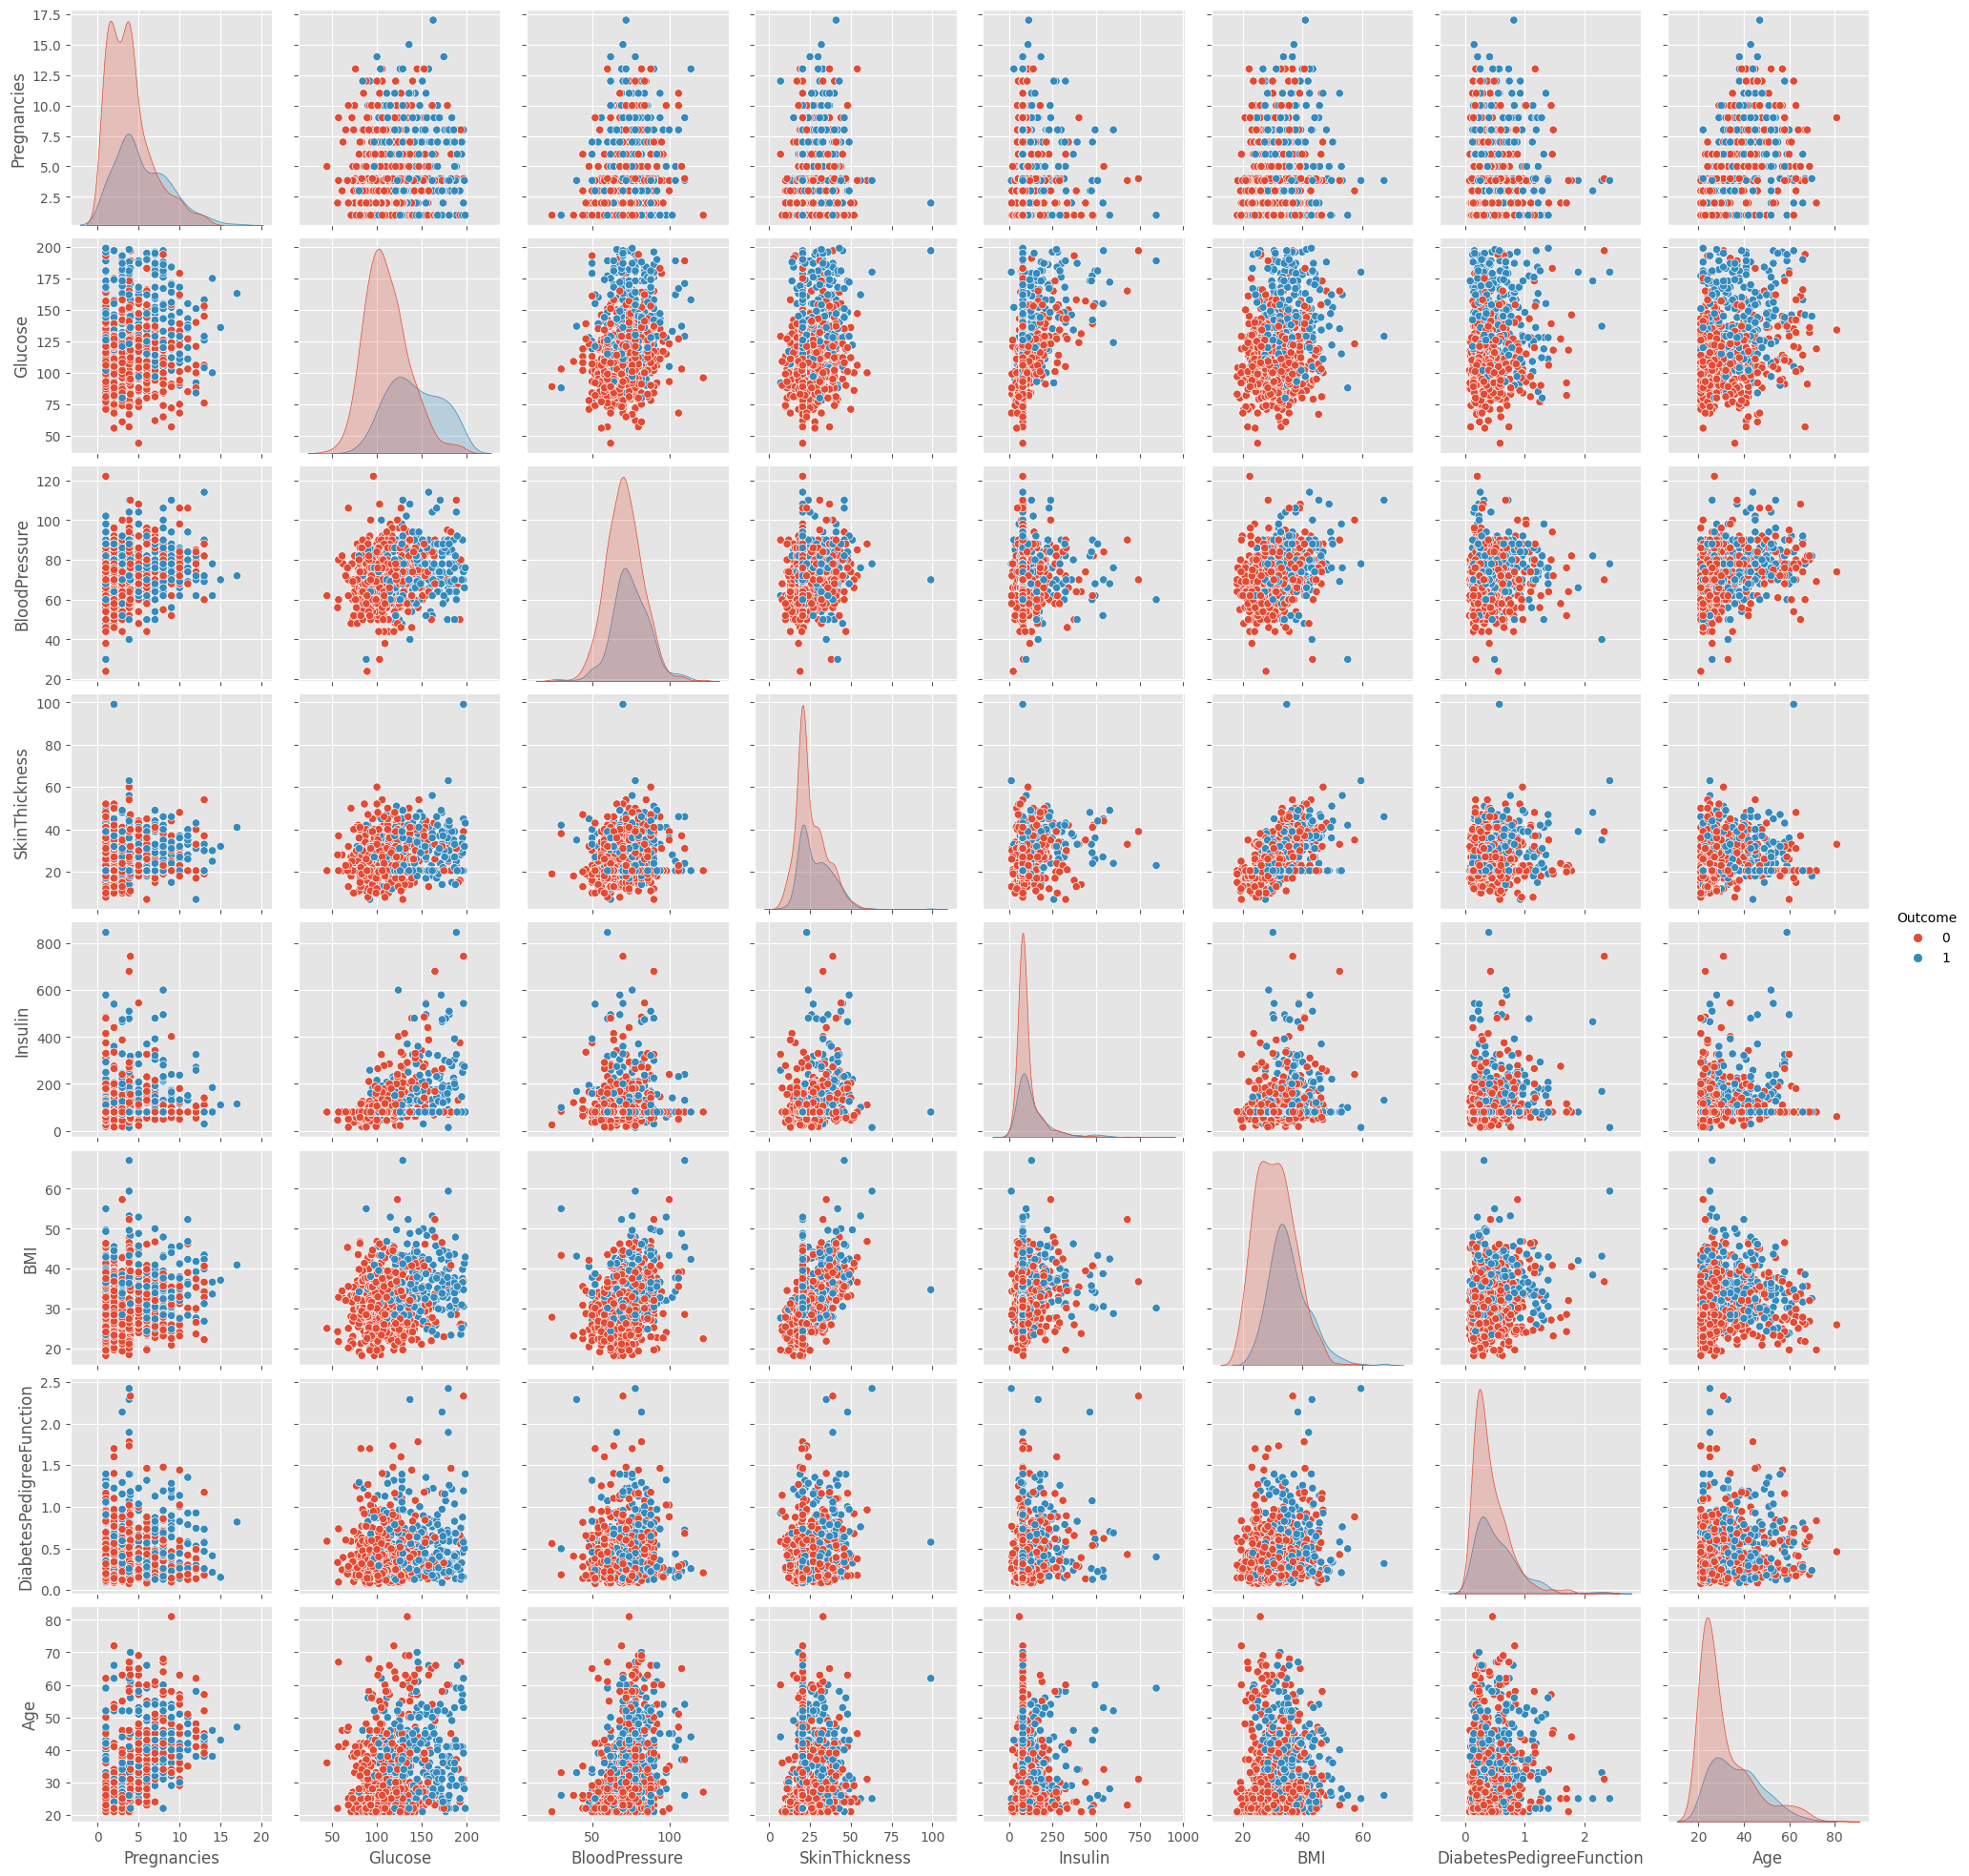

In [13]:

sns.pairplot(df,hue="Outcome")

# Feature Engineering

* Outlier detection for Pregnancies

In [14]:
for outlier_detect in df:
    
    Q1 = df[outlier_detect].quantile(0.25)
    Q3 = df[outlier_detect].quantile(0.75)
    
    IQR = Q3-Q1
    
    lower = Q1- 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    if df[(df[outlier_detect] > upper)].any(axis=None):
        print(outlier_detect,":yes")
    
    else:
        print(outlier_detect, ":no")

Pregnancies :yes
Glucose :no
BloodPressure :yes
SkinThickness :yes
Insulin :yes
BMI :yes
DiabetesPedigreeFunction :yes
Age :yes
Outcome :no


In [15]:
Q1=df["Pregnancies"].quantile(0.25)
Q3=df["Pregnancies"].quantile(0.75)
IQR=Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df = df[(df["Pregnancies"]>lower_limit)&(df["Pregnancies"]<upper_limit)]


In [16]:
Q1=df["BloodPressure"].quantile(0.25)
Q3=df["BloodPressure"].quantile(0.75)
IQR=Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df = df[(df["BloodPressure"]>lower_limit)&(df["BloodPressure"]<upper_limit)]

In [17]:
Q1=df["BMI"].quantile(0.25)
Q3=df["BMI"].quantile(0.75)
IQR=Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df = df[(df["BMI"]>lower_limit)&(df["BMI"]<upper_limit)]

In [18]:
Q1=df["SkinThickness"].quantile(0.25)
Q3=df["SkinThickness"].quantile(0.75)
IQR=Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df = df[(df["SkinThickness"]>lower_limit)&(df["SkinThickness"]<upper_limit)]

In [19]:
Q1=df["Glucose"].quantile(0.25)
Q3=df["Glucose"].quantile(0.75)
IQR=Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df = df[(df["Glucose"]>lower_limit)&(df["Glucose"]<upper_limit)]

In [20]:
Q1=df["Insulin"].quantile(0.25)
Q3=df["Insulin"].quantile(0.75)
IQR=Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df = df[(df["Insulin"]>lower_limit)&(df["Insulin"]<upper_limit)]

In [21]:
Q1=df["DiabetesPedigreeFunction"].quantile(0.25)
Q3=df["DiabetesPedigreeFunction"].quantile(0.75)
IQR=Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df = df[(df["DiabetesPedigreeFunction"]>lower_limit)&(df["DiabetesPedigreeFunction"]<upper_limit)]

In [22]:
Q1=df["Age"].quantile(0.25)
Q3=df["Age"].quantile(0.75)
IQR=Q3-Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df = df[(df["Age"]>lower_limit)&(df["Age"]<upper_limit)]

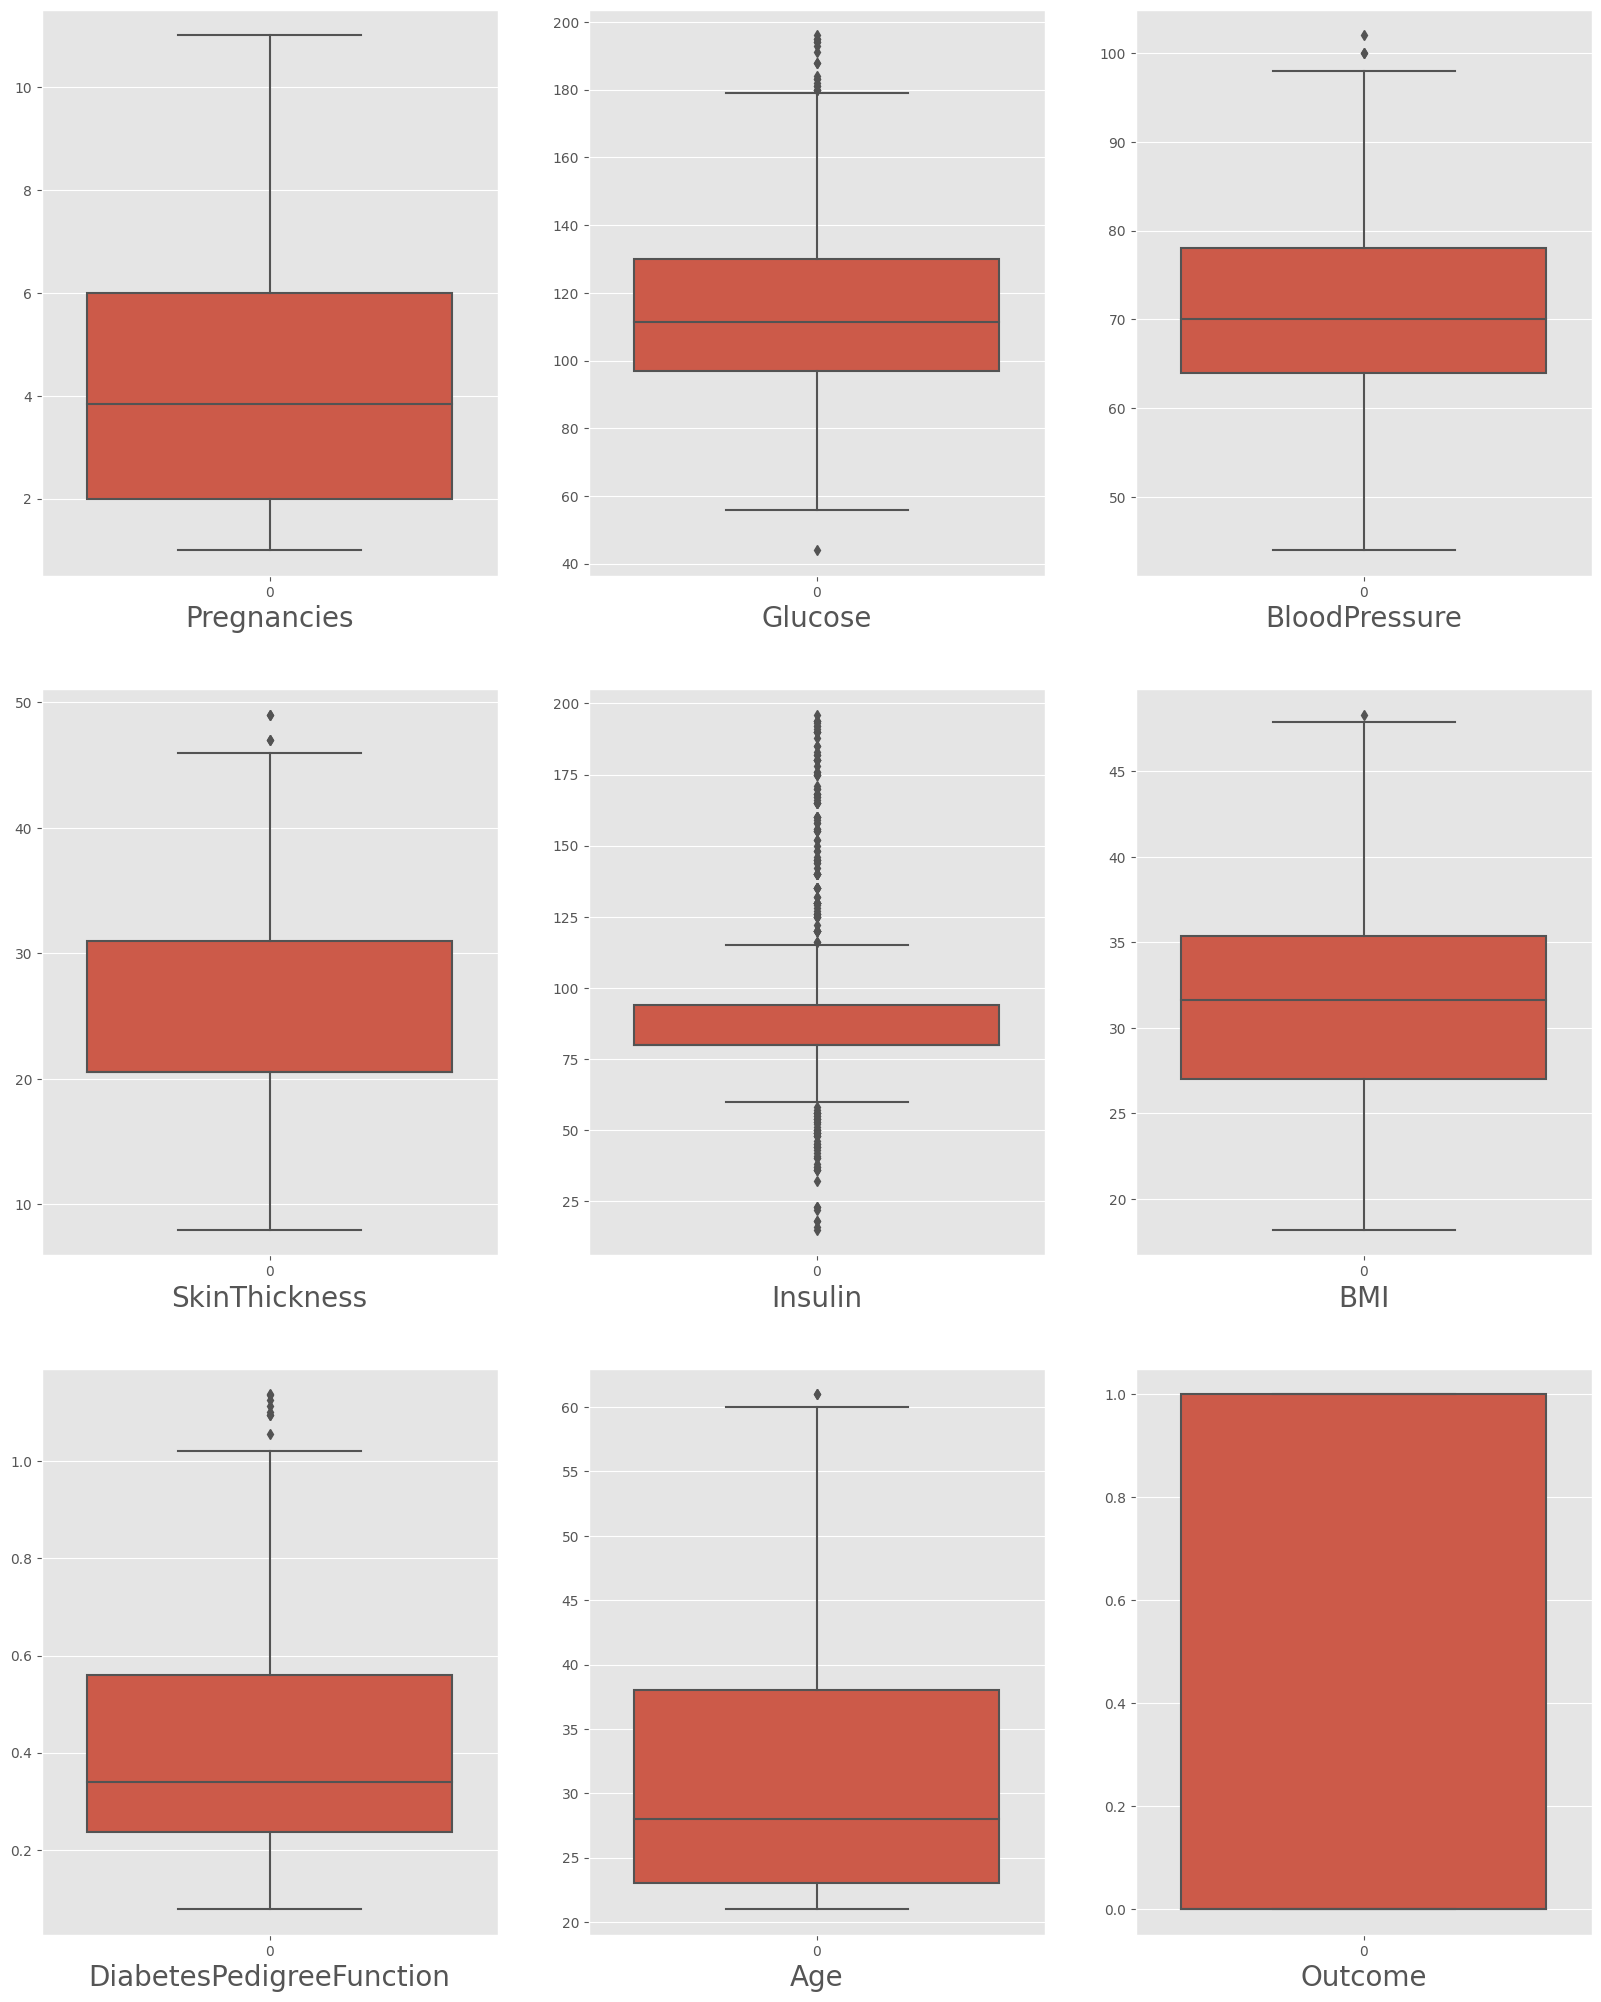

In [23]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

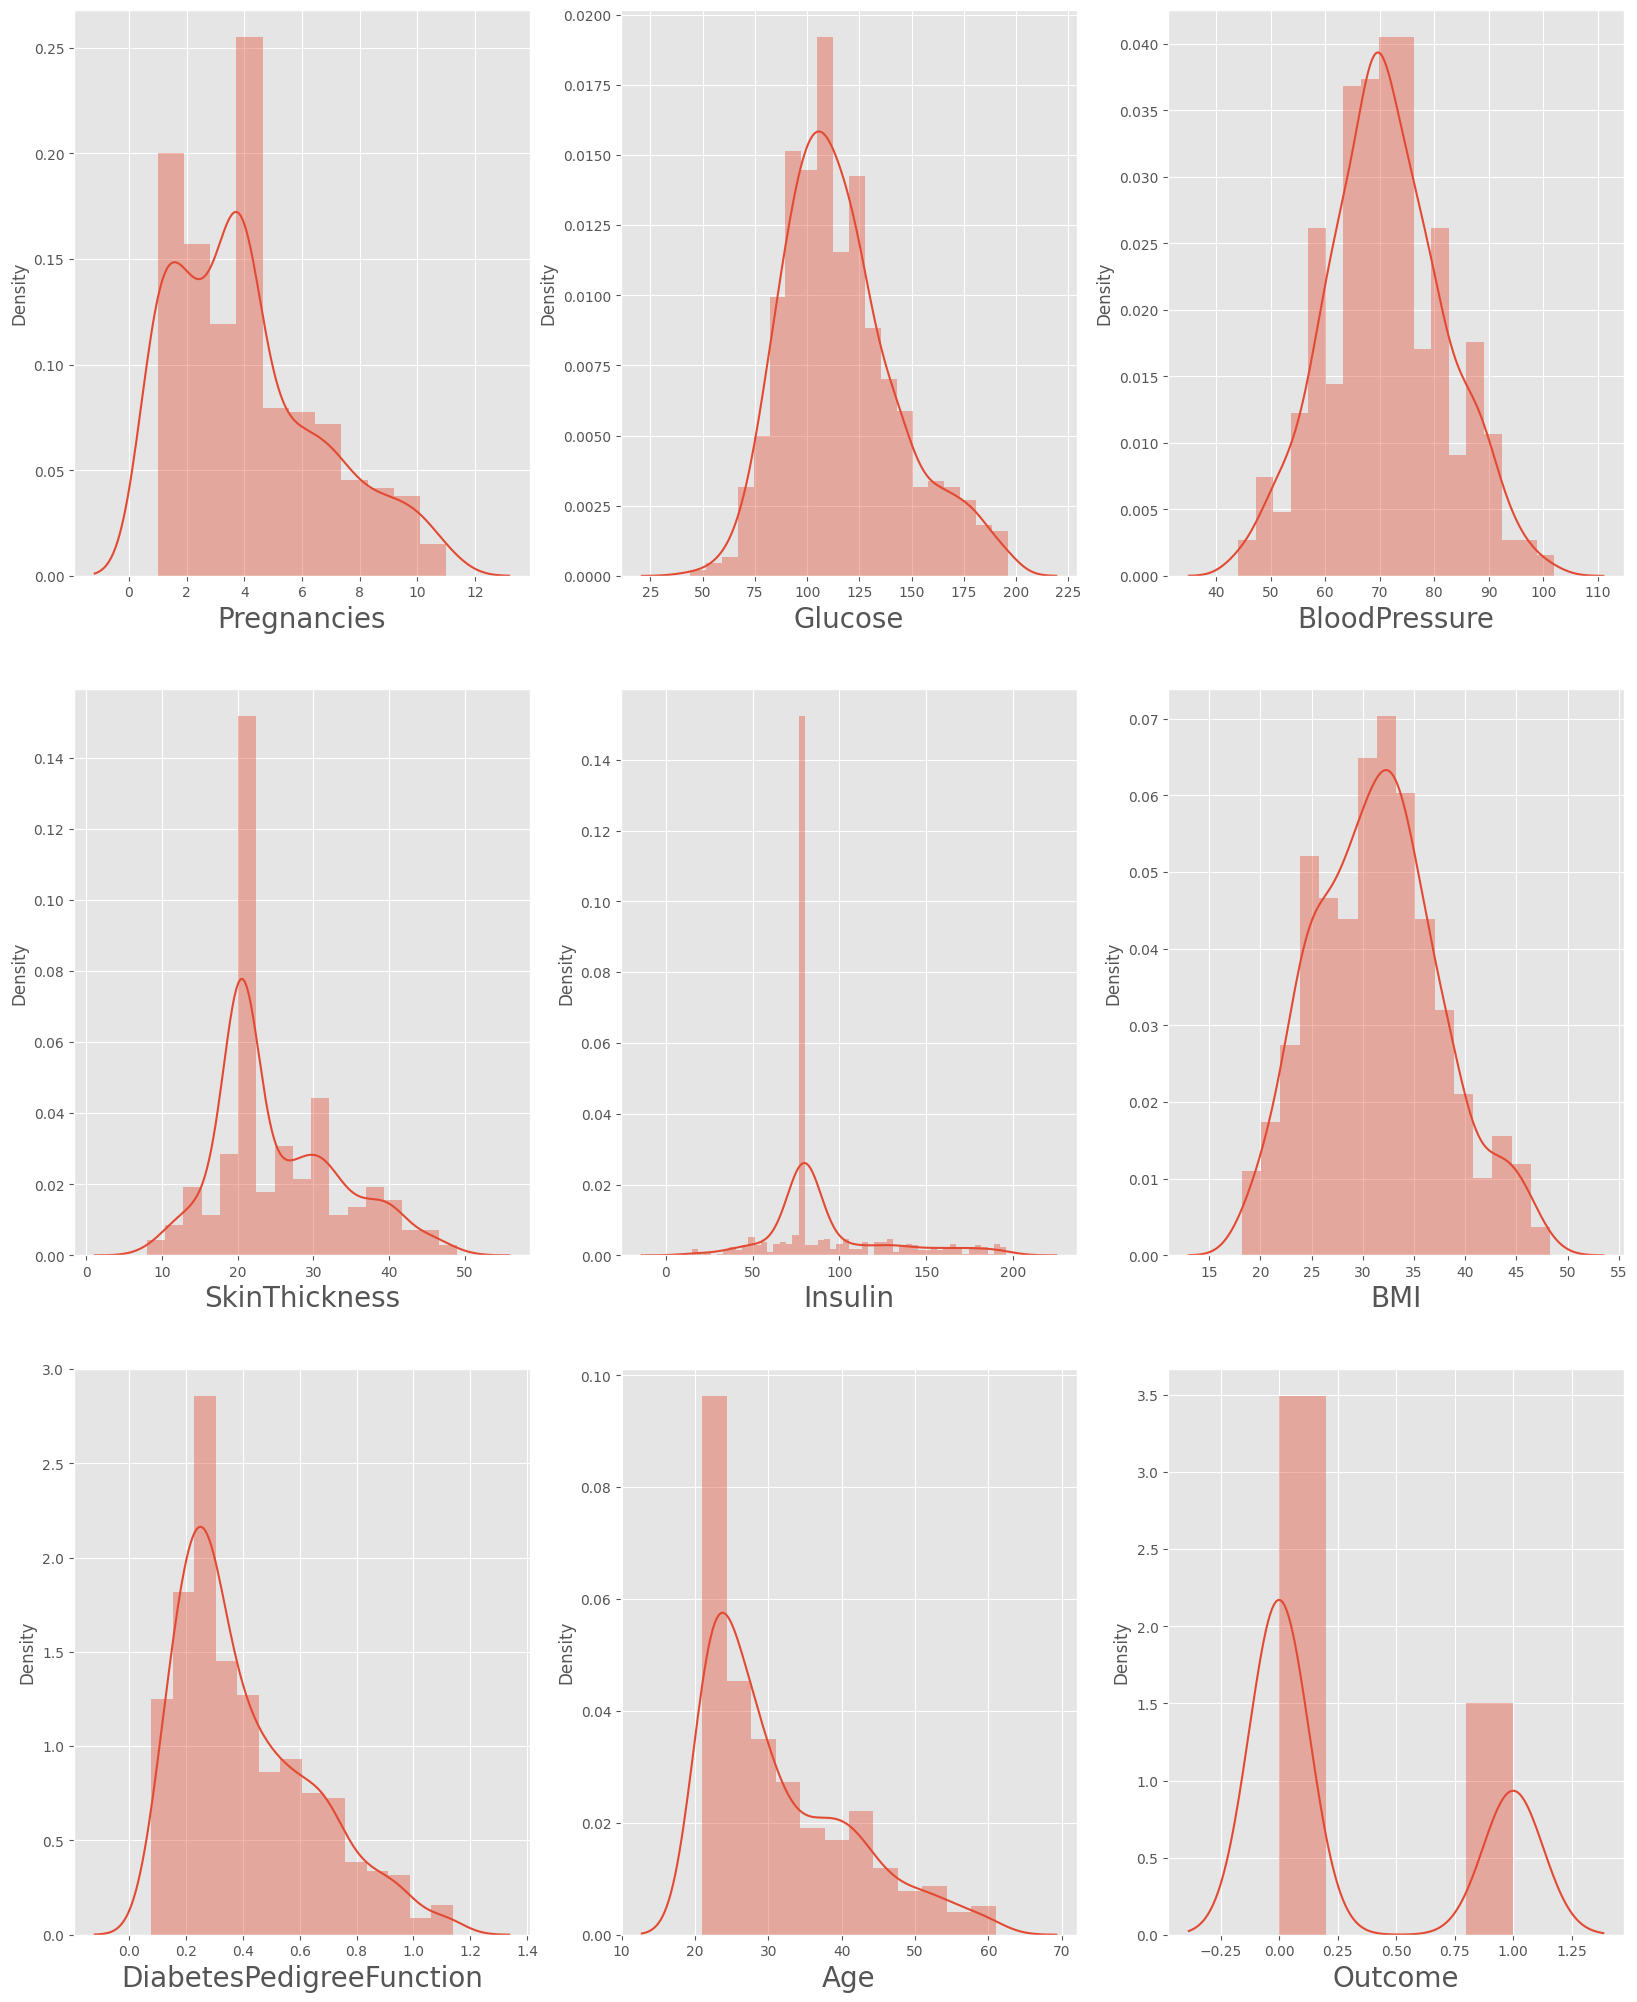

In [24]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

# **Scalling data**
* As our Outcome feature is already scaled need not to scaled down the values

In [25]:
X=df[["Glucose","Insulin","BMI","Age"]].values
y=df["Outcome"].values

X.shape,y.shape

((582, 4), (582,))

In [26]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
X_Scaled=scaler.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y,test_size=0.25)

# Model Building

In [28]:
from sklearn.neighbors import KNeighborsClassifier


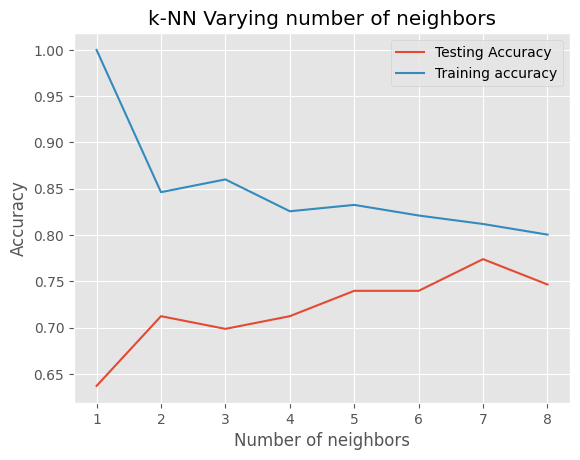

In [29]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test)

#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

> We can observe above that we get maximum testing accuracy for k=7. So lets create a KNeighborsClassifier with number of neighbors as 7.

In [30]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.773972602739726

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score

y_pred_knn=knn.predict(x_test)
print("Knn Accuracy score",accuracy_score(y_test,y_pred_knn))

Knn Accuracy score 0.773972602739726


In [32]:
cm=confusion_matrix(y_test,y_pred_knn)
cm

array([[88, 15],
       [18, 25]])

<AxesSubplot: >

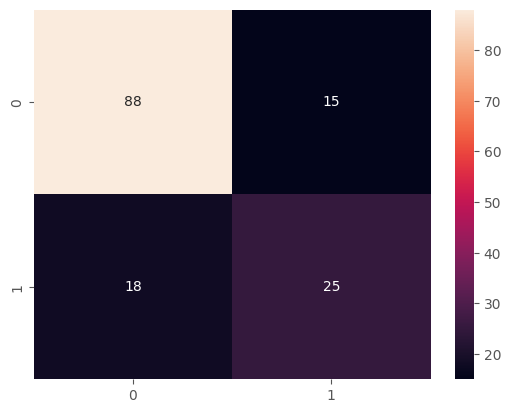

In [33]:
sns.heatmap(pd.DataFrame(cm),annot=True)

# Building Prediction System

In [34]:
'''"Glucose","Insulin","BMI","Age"'''

input_data=[102,85,37.9,40]
input_data_as_reshaped=np.asarray(input_data).reshape(1,-1)
prediction=knn.predict(input_data_as_reshaped)
if(prediction==0):
    print("You Have Diabetes,Consult with doctor")
else:
    print("You Don't have Diabetes")

You Don't have Diabetes


In [35]:
import pickle 
pickle_out = open("Automating_Diabetes_Prediction.pkl", mode = "wb") 
pickle.dump(knn, pickle_out) 
pickle_out.close()

# Hyper Parameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid={"n_neighbors":[3,5,7,9,11,13,15],
           "p":[1,2]}
gridsearch=GridSearchCV(knn,param_grid,verbose=3,cv=4)

In [38]:
gridsearch.fit(x_train,y_train)

Fitting 4 folds for each of 14 candidates, totalling 56 fits
[CV 1/4] END ................n_neighbors=3, p=1;, score=0.743 total time=   0.0s
[CV 2/4] END ................n_neighbors=3, p=1;, score=0.725 total time=   0.0s
[CV 3/4] END ................n_neighbors=3, p=1;, score=0.734 total time=   0.0s
[CV 4/4] END ................n_neighbors=3, p=1;, score=0.761 total time=   0.0s
[CV 1/4] END ................n_neighbors=3, p=2;, score=0.706 total time=   0.0s
[CV 2/4] END ................n_neighbors=3, p=2;, score=0.679 total time=   0.0s
[CV 3/4] END ................n_neighbors=3, p=2;, score=0.761 total time=   0.0s
[CV 4/4] END ................n_neighbors=3, p=2;, score=0.752 total time=   0.0s
[CV 1/4] END ................n_neighbors=5, p=1;, score=0.761 total time=   0.0s
[CV 2/4] END ................n_neighbors=5, p=1;, score=0.688 total time=   0.0s
[CV 3/4] END ................n_neighbors=5, p=1;, score=0.780 total time=   0.0s
[CV 4/4] END ................n_neighbors=5, p=1;

GridSearchCV(cv=4, estimator=KNeighborsClassifier(n_neighbors=7),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'p': [1, 2]},
             verbose=3)

In [39]:
gridsearch.best_params_

{'n_neighbors': 15, 'p': 2}

In [40]:
knn=KNeighborsClassifier(n_neighbors=9,p=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [41]:
y_pred=knn.predict(x_test)

In [42]:
accuracy_score(y_test,y_pred)

0.726027397260274

In [43]:
f1_score(y_test,y_pred)

0.48717948717948717

In [44]:
x_test.shape

(146, 4)

In [45]:
confusion_matrix(y_test,y_pred)

array([[87, 16],
       [24, 19]])

In [46]:
#import classification_report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       103
           1       0.54      0.44      0.49        43

    accuracy                           0.73       146
   macro avg       0.66      0.64      0.65       146
weighted avg       0.71      0.73      0.72       146



# ROC (Reciever Operating Charecteristic) curve

In [47]:
from sklearn.metrics import roc_curve

In [48]:
y_pred_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

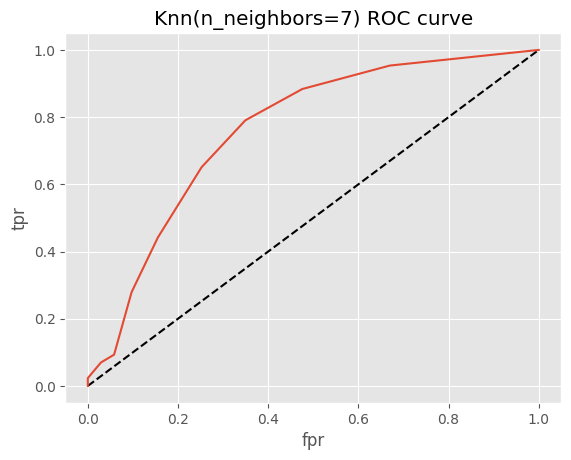

In [49]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [50]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7614585685256265